# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

The used cars (second-hand) Indian market is an attractive alternative to new car markets. These cars are not new from the factory but were pre-owned by another person before being advertised for sale later. Buying a used car has some advantages over purchasing new cars:

   - They are generally cheaper than new cars
   - The value of new cars depreciates quickly soon after their sale from factory
   - Some new cars are discontinued, while a buyer can find old brands and models in the used car market
   
  Several factors influence the pricing of used cars, including their power system, number of seats, car age or mileage.

### **The objective:**

The goal of this project is to build a pricing model to predict the price of used cars. The model predictions can be used by the business to design an effective price scheme that segments the market into used and new cars.

### **The key questions:**

The project will answer the following questions concerning used cars:
   
- What are the main drivers of the price?
- Which attributes increase or decrease the price?
- Can the model accurately predict the price of a used car?


### **The problem formulation**:

Data Science will provide the necessary tools to answer these questions. This project will perform exploratory data analysis, feature engineering, and model building to predict the price of used cars. The project will assess the model performance across four types of supervised machine learning techniques:

   - Linear regression
   - Ridge and Lasso regressions
   - Decision tree
   - Random forest

### **Data Dictionary**

|Variable | Description |
| :---:  |  :---:      |
|**S.No.** | Serial Number|
|**Name** | Name of the car which includes Brand name and Model name|
|**Location** | The location in which the car is being sold or is available for purchase (Cities)|
|**Year** | Manufacturing year of the car|
|**Kilometers_driven** | The total kilometers driven in the car by the previous owner(s) in KM|
|**Fuel_Type** | The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)|
|**Transmission** | The type of transmission used by the car (Automatic / Manual)|
|**Owner** | Type of ownership|
|**Mileage** | The standard mileage offered by the car company in kmpl or km/kg|
|**Engine** | The displacement volume of the engine in CC|
|**Power** | The maximum power of the engine in bhp|
|**Seats** | The number of seats in the car|
|**New_Price** | The price of a new car of the same model in INR 100,000|
|**Price** | The price of the used car in INR 100,000 (**Target Variable**)|

### **Loading libraries**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import pylab as py

from scipy import stats

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn import tree

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from statsmodels.graphics.gofplots import ProbPlot

from statsmodels.formula.api import ols

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Let us load the data**

In [2]:
# Load the dataset
df = pd.read_csv("used_cars.csv")

# 1. Data Overview

In [3]:
# Display a summary of the first rows of the dataset
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
# Check the number of rows and columns
df.shape

(7253, 14)

**Observations:**

The dataset has **7,253 rows and 14 rows**, with each row corresponding to a used car

In [5]:
# View a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


**Observations:**

There are 14 variables of 2 different types: 5 are **categorical** and 9 are **numeric** variables. The variables Mileage, Engine, Power, Seats, New_price and Price have **missing values**

In [6]:
# Calculate the percentage of missing-values per variable
round(df.isnull().sum()*100/len(df),2)

S.No.                 0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.63
Power                 2.41
Seats                 0.73
New_price            86.13
Price                17.01
dtype: float64

**Observations:**

Most of the variables with missing values have a small percentage (2.5%) of missing observations. However, the variable New_Price has more than 85% missing values, while the variable Price (target variable) has 17% missing observations.

## **Data Preprocessing**

### **Missing value treatment**

- We will drop **'New_price'** as the variable **has more than 85% missing observations**
- As our target variable is **'Price'**, it is not recommended to fill in the missing observations (17% of the dataset) for this variable as it can bias our findings. We will drop the corresponding rows with missing observations for this variable
- Note that the remaining variables (**Mileage, Engine, Power and Seats**) have less than 2.5% missing observations. Given the small percentage of missing values, we will **fill in** these observations with the median. We use the median to account for the presence of outliers

In [7]:
# Drop the variable 'New_Price'
df.drop(columns = {'New_price'}, inplace = True)

In [8]:
# Drop the rows with missing observations for the variable 'Price'
df.dropna(subset = ['Price'], inplace = True)

In [9]:
# Fill in missing values for the variables 'Mileage, Engine, Power and Seats' with the median
cols = ['Mileage', 'Engine', 'Power', 'Seats']

for i in cols:
    df[i].fillna(df[i].median(), inplace=True)

### **Duplicate observations**

In [10]:
# Check for duplicate observations
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [S.No., Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price]
Index: []


**Observations:**

Note that there are **no duplicate observations** in the dataset.

### **Feature Engineering (I)**

- Note that we can process the column **'Name'** to extract the car brand name. We call this new variable **'Brand'** and drop the variable **'Name'**

- We will also drop the identifier variable **'S.No.'** as it only includes the serial numbering

In [11]:
# Extract the brand name ('Brand') from the variable 'Name'
df['Brand'] = df['Name'].str.split(' ').str[0]

In [12]:
# Drop the variable 'Name'
df.drop(columns = {'Name', 'S.No.'}, inplace = True)

**Observations:**

Our final dataset now **includes 12 variables without any missing values**: 5 categorical and 7 numerical variables. We are ready to perform Exploratory Data Analysis (EDA)

In [13]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


# **2. Exploratory Data Analysis (EDA)**

### Numerical variables - Statistical summary 

In [14]:
# Perform a statistical summary for the 'numerical' variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage,6019.0,18.134966,4.581528,0.00,15.17,18.15,21.10,33.54
Engine,6019.0,1620.509221,599.635458,72.00,1198.00,1493.00,1969.00,5998.00
Power,6019.0,112.883539,53.283701,34.20,78.00,97.70,138.03,560.00
Seats,6019.0,5.277621,0.803479,2.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


**Observations:**

Most used cars were manufactured between the year 2013 and 2014, with the oldest and newest cars manufactured in 1998 and 2019, respectively

Used cars have on average 58,738 kilometers driven with minimum and maximum values of 171 and 6,500,000 kilometers. We will examine these values in the next sections to detect the **presence of outliers** in this variable

The mileage of used cars is 18.13 km/kg on average, with min and max values of 0 and 33.54, respectively. Cars with zero mileage may indicate they have barely driven

The average engine of used cars is 1,621 CC, ranging from 72 to 5,998

The maximum power of a used car is on average 113.25~. The power ranges from 34.2 to 560

Most used cars have 5 seats but there are some 2-passenger and 10-passenger cars

Finally, the average price of a used car is 9,479,468 INR, with some cars as cheap as 440,000 while some other as expensive as 160,000,000

### Categorical variables - Statistical summary 

In [15]:
# Perform a statistical summary of the final dataset, for 'categorial' variables
df.describe(exclude = 'number').T

,count,unique,top,freq
Location,6019,11,Mumbai,790
Fuel_Type,6019,5,Diesel,3205
Transmission,6019,2,Manual,4299
Owner_Type,6019,4,First,4929
Brand,6019,31,Maruti,1211


**Observations:**

There are **11 unique locations** were used cars are being put up for sale and Mumbai tops the list

Diesel is the most common type of fuel (among **5 fuel categories**)

Most used cars have a **manual transmission** (as opposed to automatic) and they belong to **first owners**

Finally, the most popular brand (among **31 brands**) of used cars is Maruti

## **2.1 Univariate Analysis**

### Numerical variables - Histograms

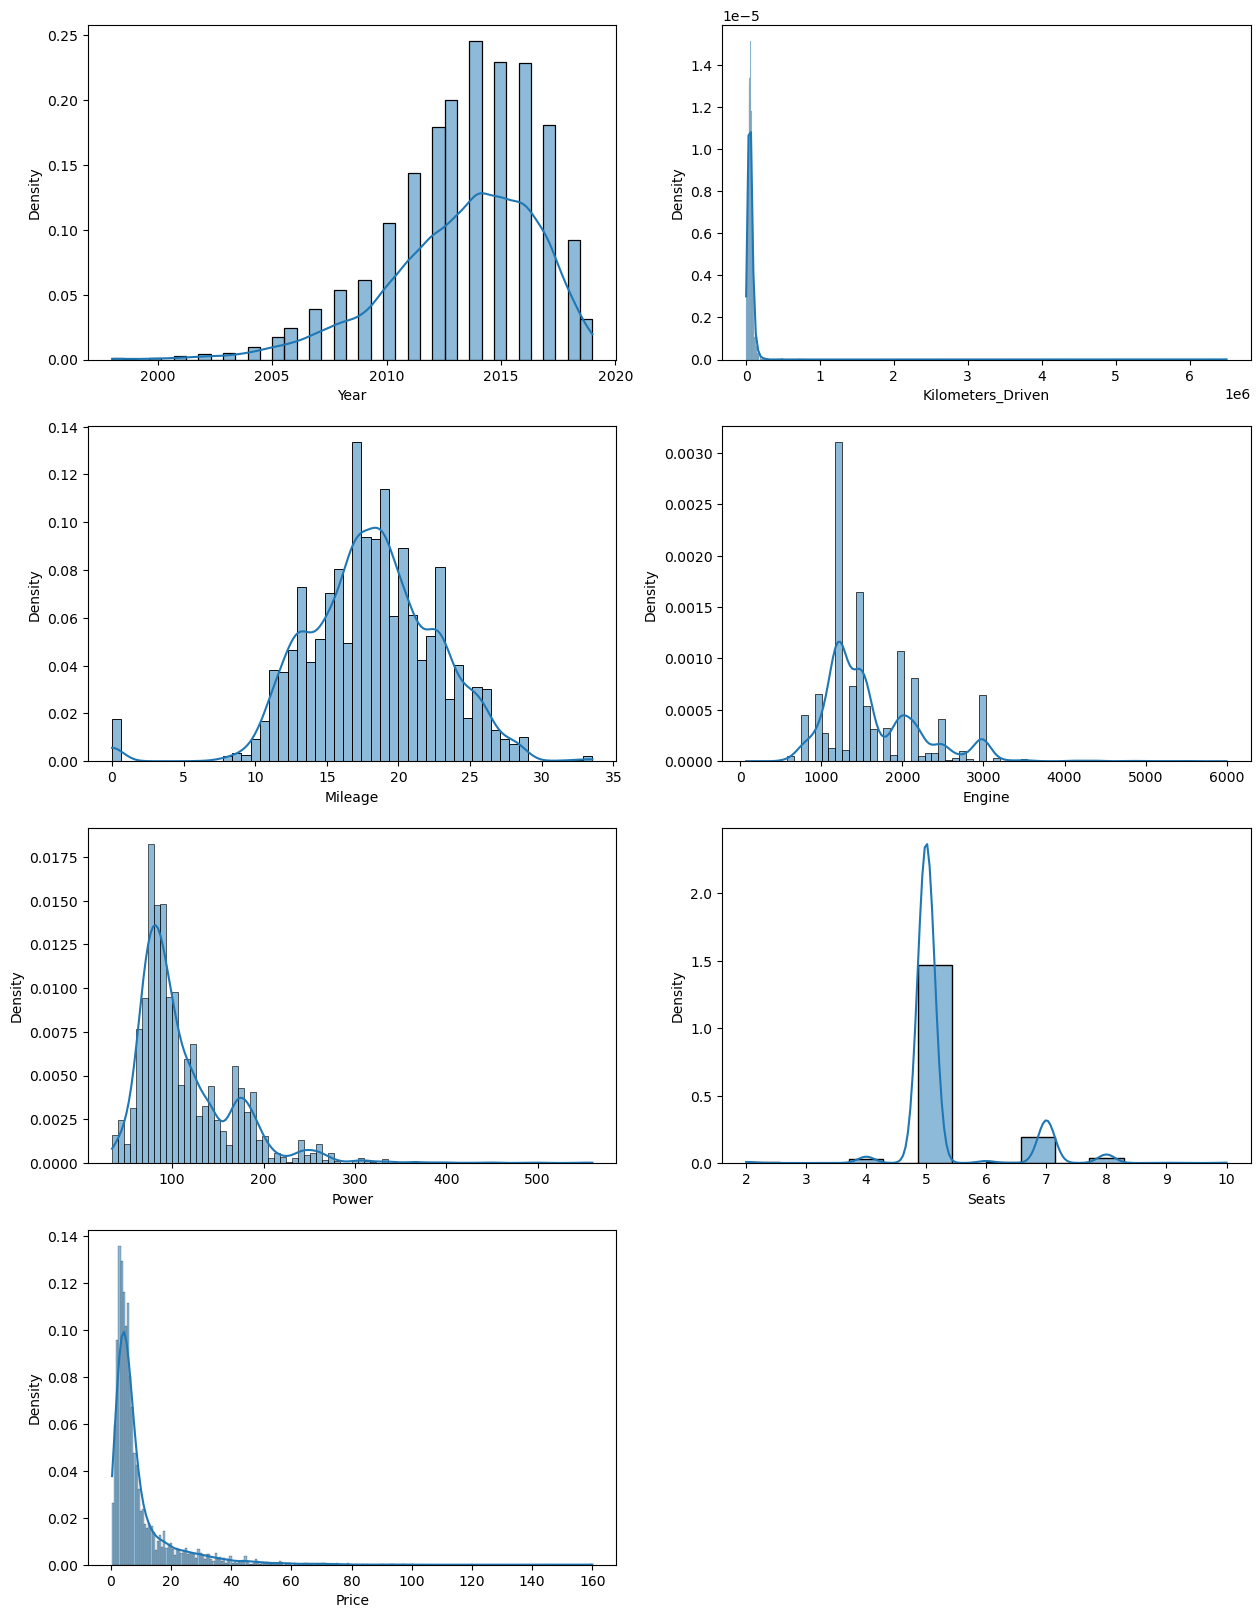

In [16]:
# Plot all the numeric variables

# Create the figure and axes
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

axe = axes.ravel()

numeric_cols = df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

for col, ax in zip(numeric_cols, axe):
    sns.histplot(data = df[col], kde = True, stat='density', ax = ax)

# Check if there is something plotted in the chart
for ax in axe.flat:
    if not bool(ax.has_data()):
        fig.delaxes(ax)
    
plt.show()

**Observations:**

The distribution of Year is left-skewed, which indicates that most used cars were manufactured in recent years

Kilometers_driven is heavily right-skewed, suggesting that most used cars have relatively few kilometers. However, we can observe a very large tail, which may indicate the presence of large outliers. We will examine this shortly

The distribution of Mileage is centered around a value of between 15 to 20 km/kg

Engine and Power are right-skewed, indicating that most used cars have displacement volumes and maximum power

Finally, the distribution of the target variable (Price) is right-skewed, suggesting that most used cars are priced in a range below 400,000 INR. We will log_transform this variable in the feature engineering section

### Numerical variables - Boxplots

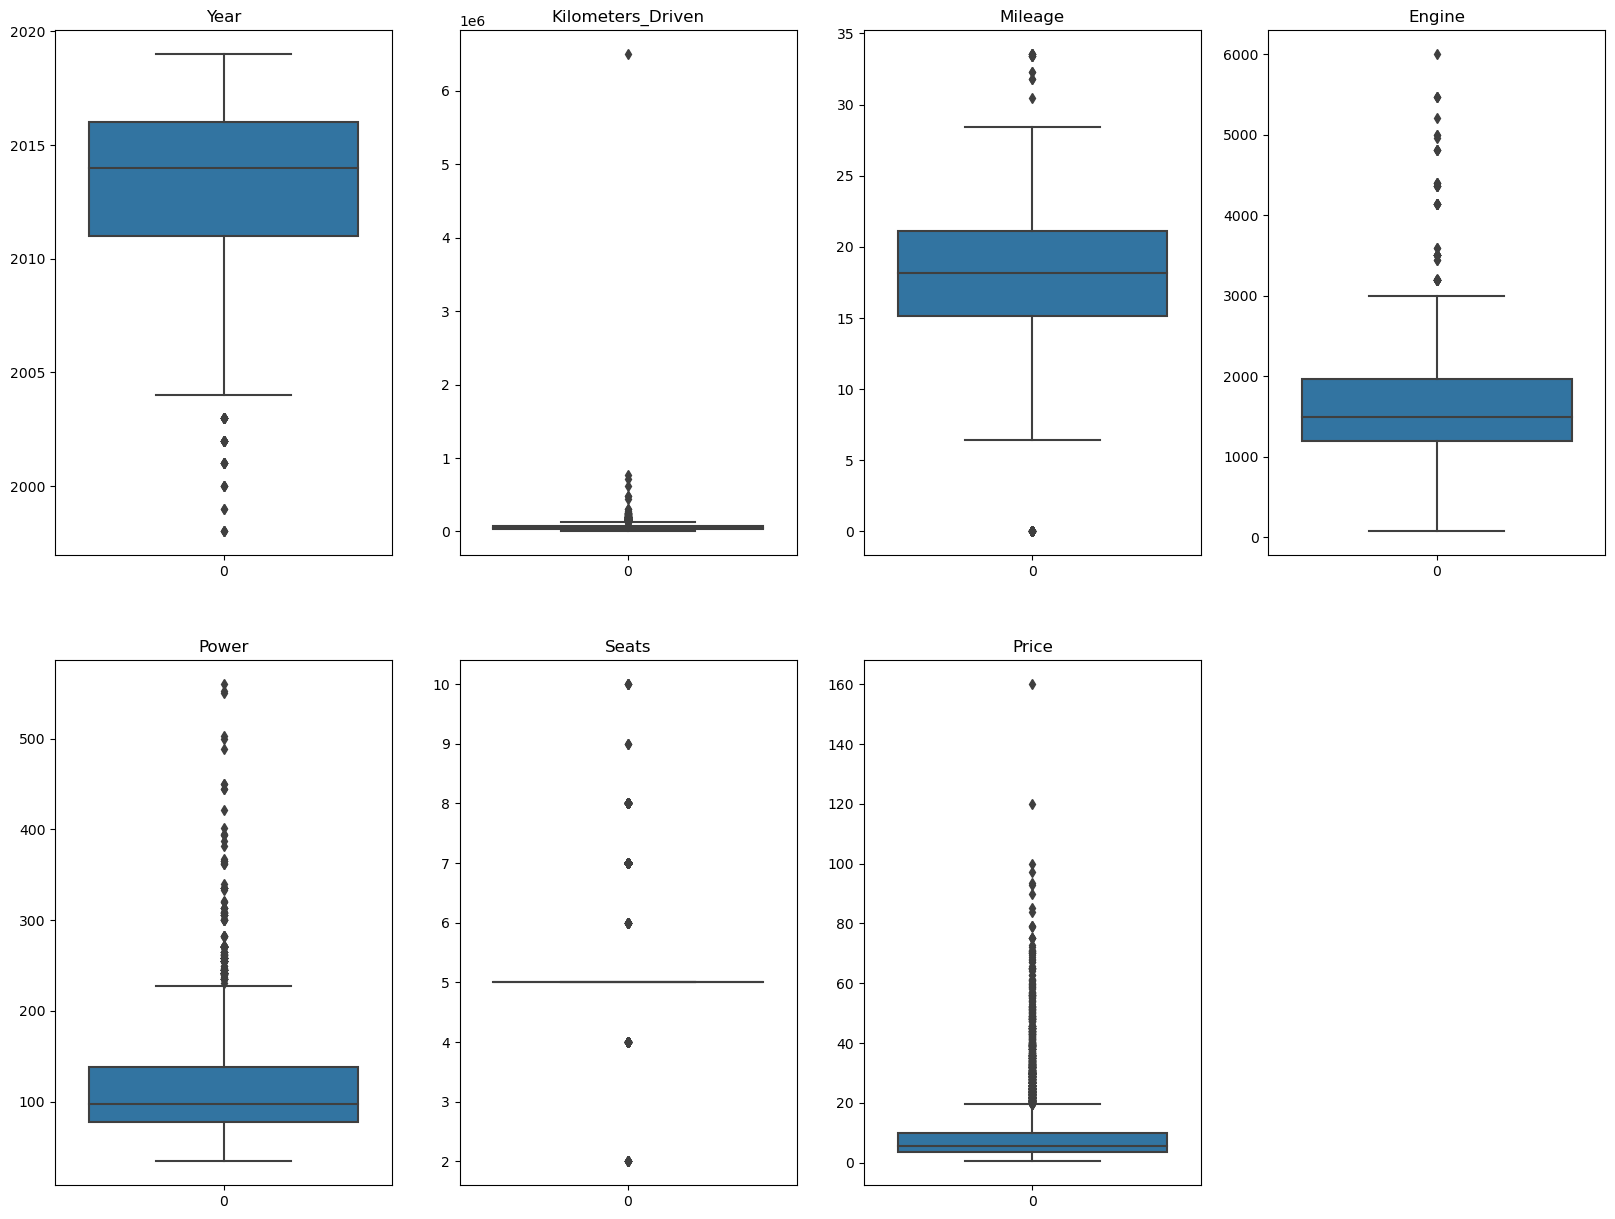

In [17]:
# Plot the boxplots for these numerical variables (to detect outliers)

# Create the figure and axes
fig, axes = plt.subplots(2, 4, figsize=(20,15))

axe = axes.ravel()

numeric_cols = df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

for col, ax in zip(numeric_cols, axe):
    sns.boxplot(data = df[col], ax = ax)
    ax.set_title(str(col))

# Check if there is something plotted in the chart
for ax in axe.flat:
    if not bool(ax.has_data()):
        fig.delaxes(ax)
    
plt.show()

**Observations:**

As mentioned in the sections above, the variable **Kilometers_driven has a very extreme value** (6,500,000 kms) which looks unrealistic for any car. We will treat this variable in the feature engineering section

We also note that most variables have some outliers but these are closer to the bulk of the distribution, so we will leave them as they are

### Categorical variables - Bar chart

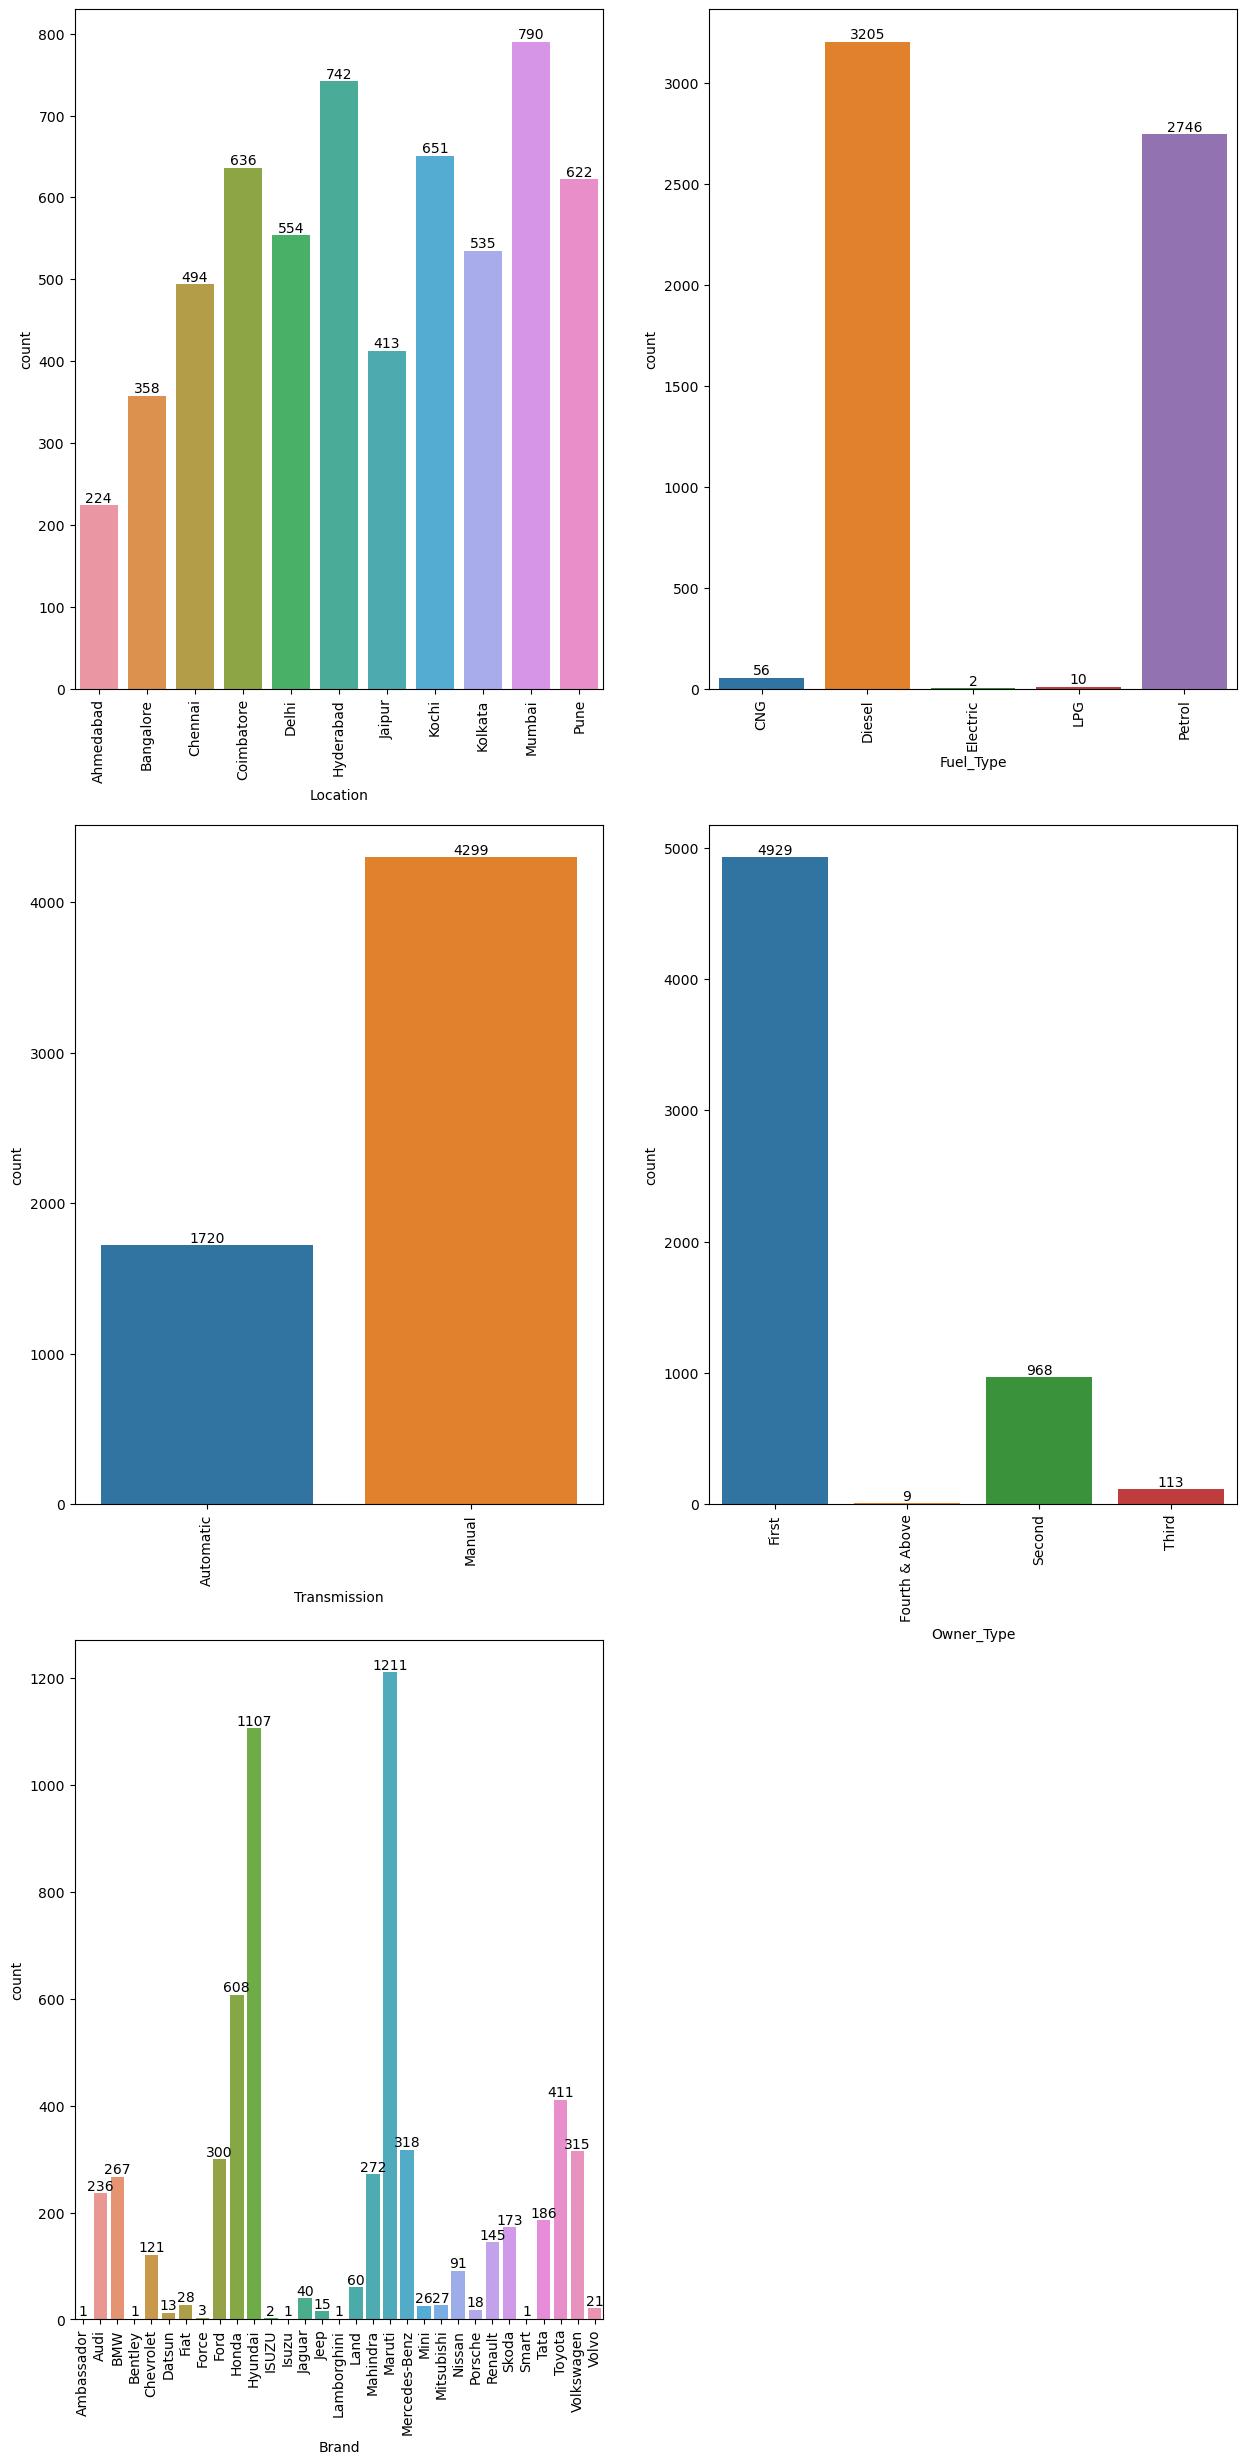

In [18]:
# Plot all the categorial variables

# Create the figure and axes
fig, axes = plt.subplots(3, 2, figsize=(15,30))

axe = axes.ravel()

categorical_cols = df[['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']]
xlabel = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']

for col, x, ax in zip(categorical_cols, xlabel, axe):
    chart = sns.countplot(data = df, x = x, ax = ax, order = df[col].value_counts().sort_index(ascending=True).index)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    ax.bar_label(ax.containers[0], label_type='edge')

# Check if there is something plotted in the chart
for ax in axe.flat:
    if not bool(ax.has_data()):
        fig.delaxes(ax)
    
plt.show()

**Observations:**

Note that **Mumbai, Hyderabad and Coimbatore** are the most popular locations for used cars

**Diesel and Petrol** are by far the most common fuel type for used cars

Most used cars have a **Manual transmission**, with a ratio of 2.5 to 1, compared with Automatic cars

**First owners** are by far the most common type of owners

**Maruti and Hyundai** are the most popular brands, followed by Honda and Toyota. **Smart and Ambassador** are among the least popular brands

## **2.2 Bivariate Analysis**

### Correlation heatmap

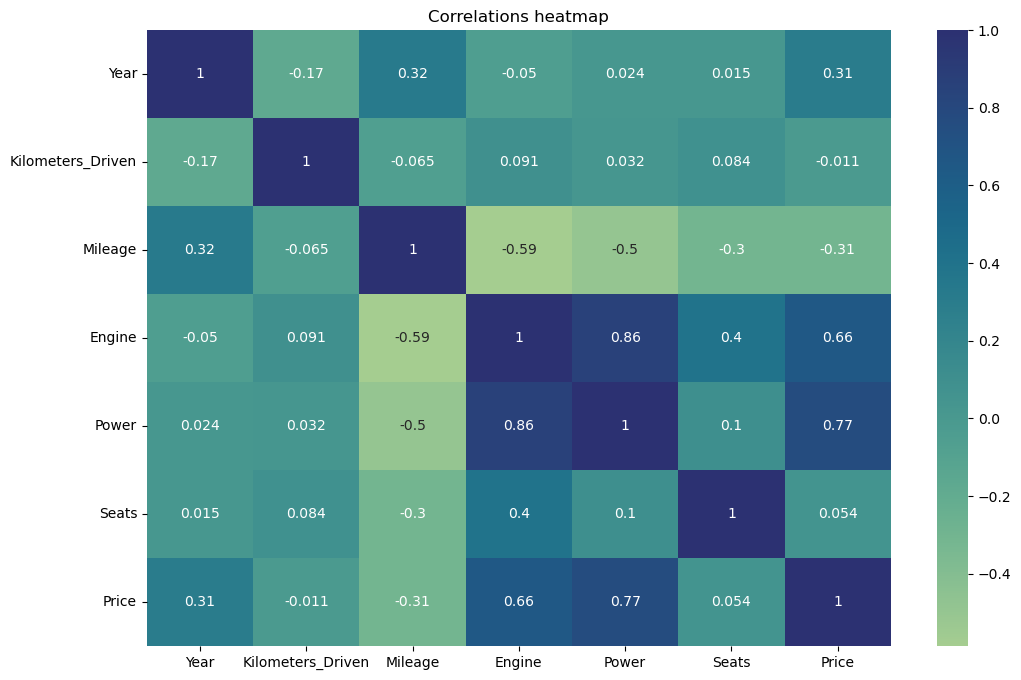

In [19]:
# Compute correlations and display the corresponding heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'crest')
plt.title('Correlations heatmap')

plt.show()

**Observations:**

The variables **Mileage, Engine, Power and Price** display the strongest correlations (lower than -0.5 or greater tha 0.5) among each other. We will show the **scatterplot** for these variables:

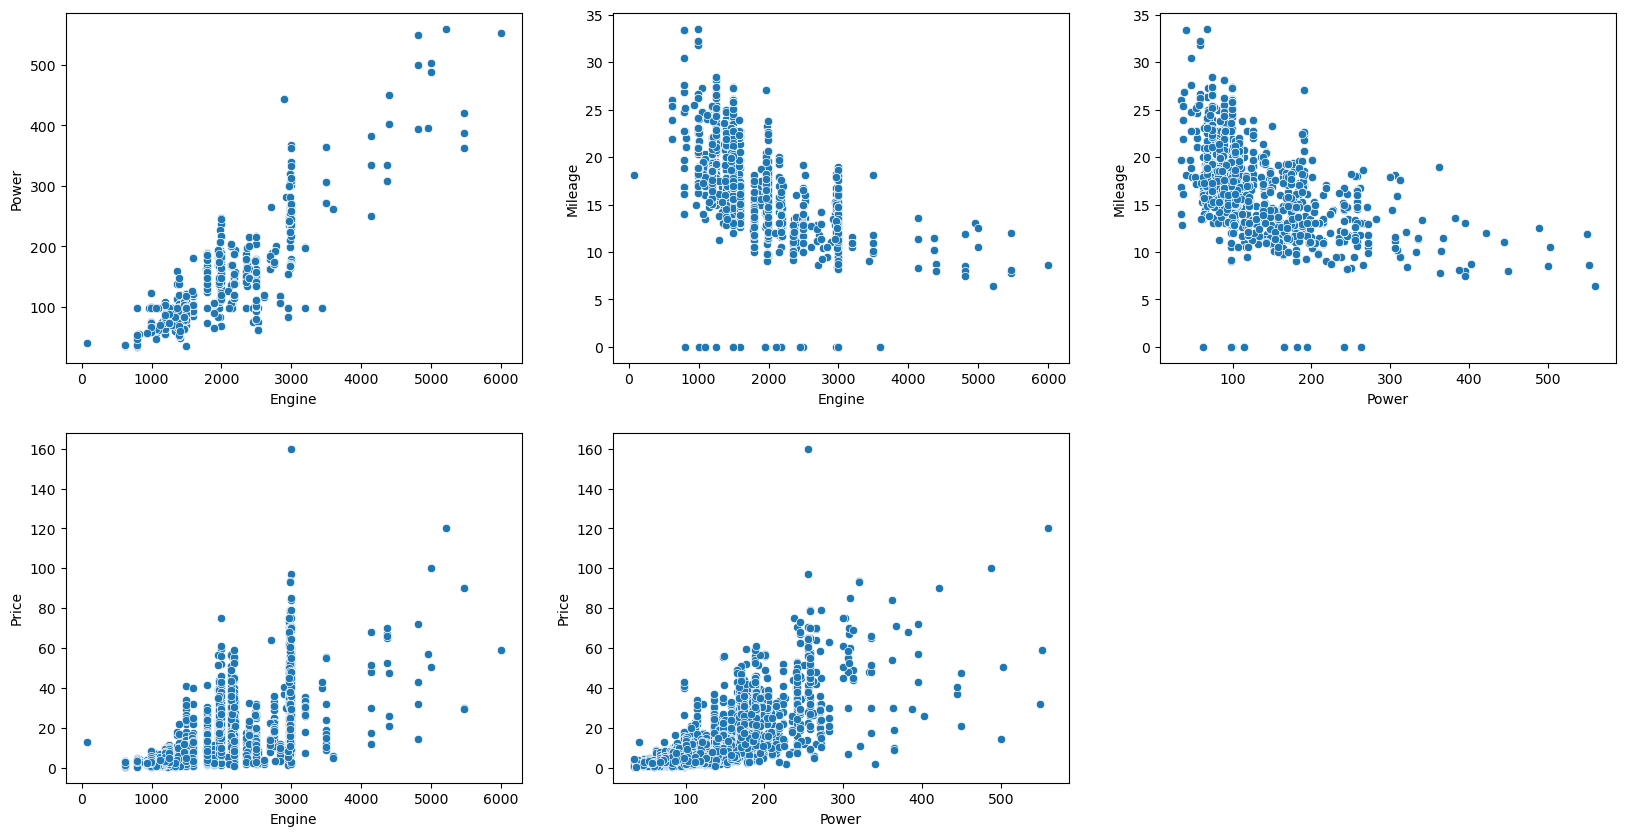

In [20]:
# Show the scatterplot for each of the pair of variables with a correlation lower than -0.5 or greater than 0.5
fig, axes = plt.subplots(2, 3, figsize=(20,10))

axe = axes.ravel()

# For the variables correlated with INDUS
sns.scatterplot(x = 'Engine', y = 'Power', data = df, ax = axes[0,0])

# For the variables correlated with NOX
sns.scatterplot(x = 'Engine', y = 'Mileage', data = df, ax = axes[0,1])
sns.scatterplot(x = 'Power', y = 'Mileage', data = df, ax = axes[0,2])

# For the variables correlated with NOX
sns.scatterplot(x = 'Engine', y = 'Price', data = df, ax = axes[1,0])
sns.scatterplot(x = 'Power', y = 'Price', data = df, ax = axes[1,1])


# Check if there is something plotted in the chart
for ax in axe.flat:
    if not bool(ax.has_data()):
        fig.delaxes(ax)

plt.show()

**Observations:**

**Power and Engine** show a strong positive correlation with each other, suggesting that used cars with high displacement volumes have maximum power in their engine

Given the correlation observed between these two features inherent to car engines, mileage is negatively correlated with both Engine and Power. This suggests that used cars with more powerful motors tend to have fewer mileage

Lastly, **Price** is positively correlated with these features of used car engines. Although the correlation between Price and Engine is slightly higher 

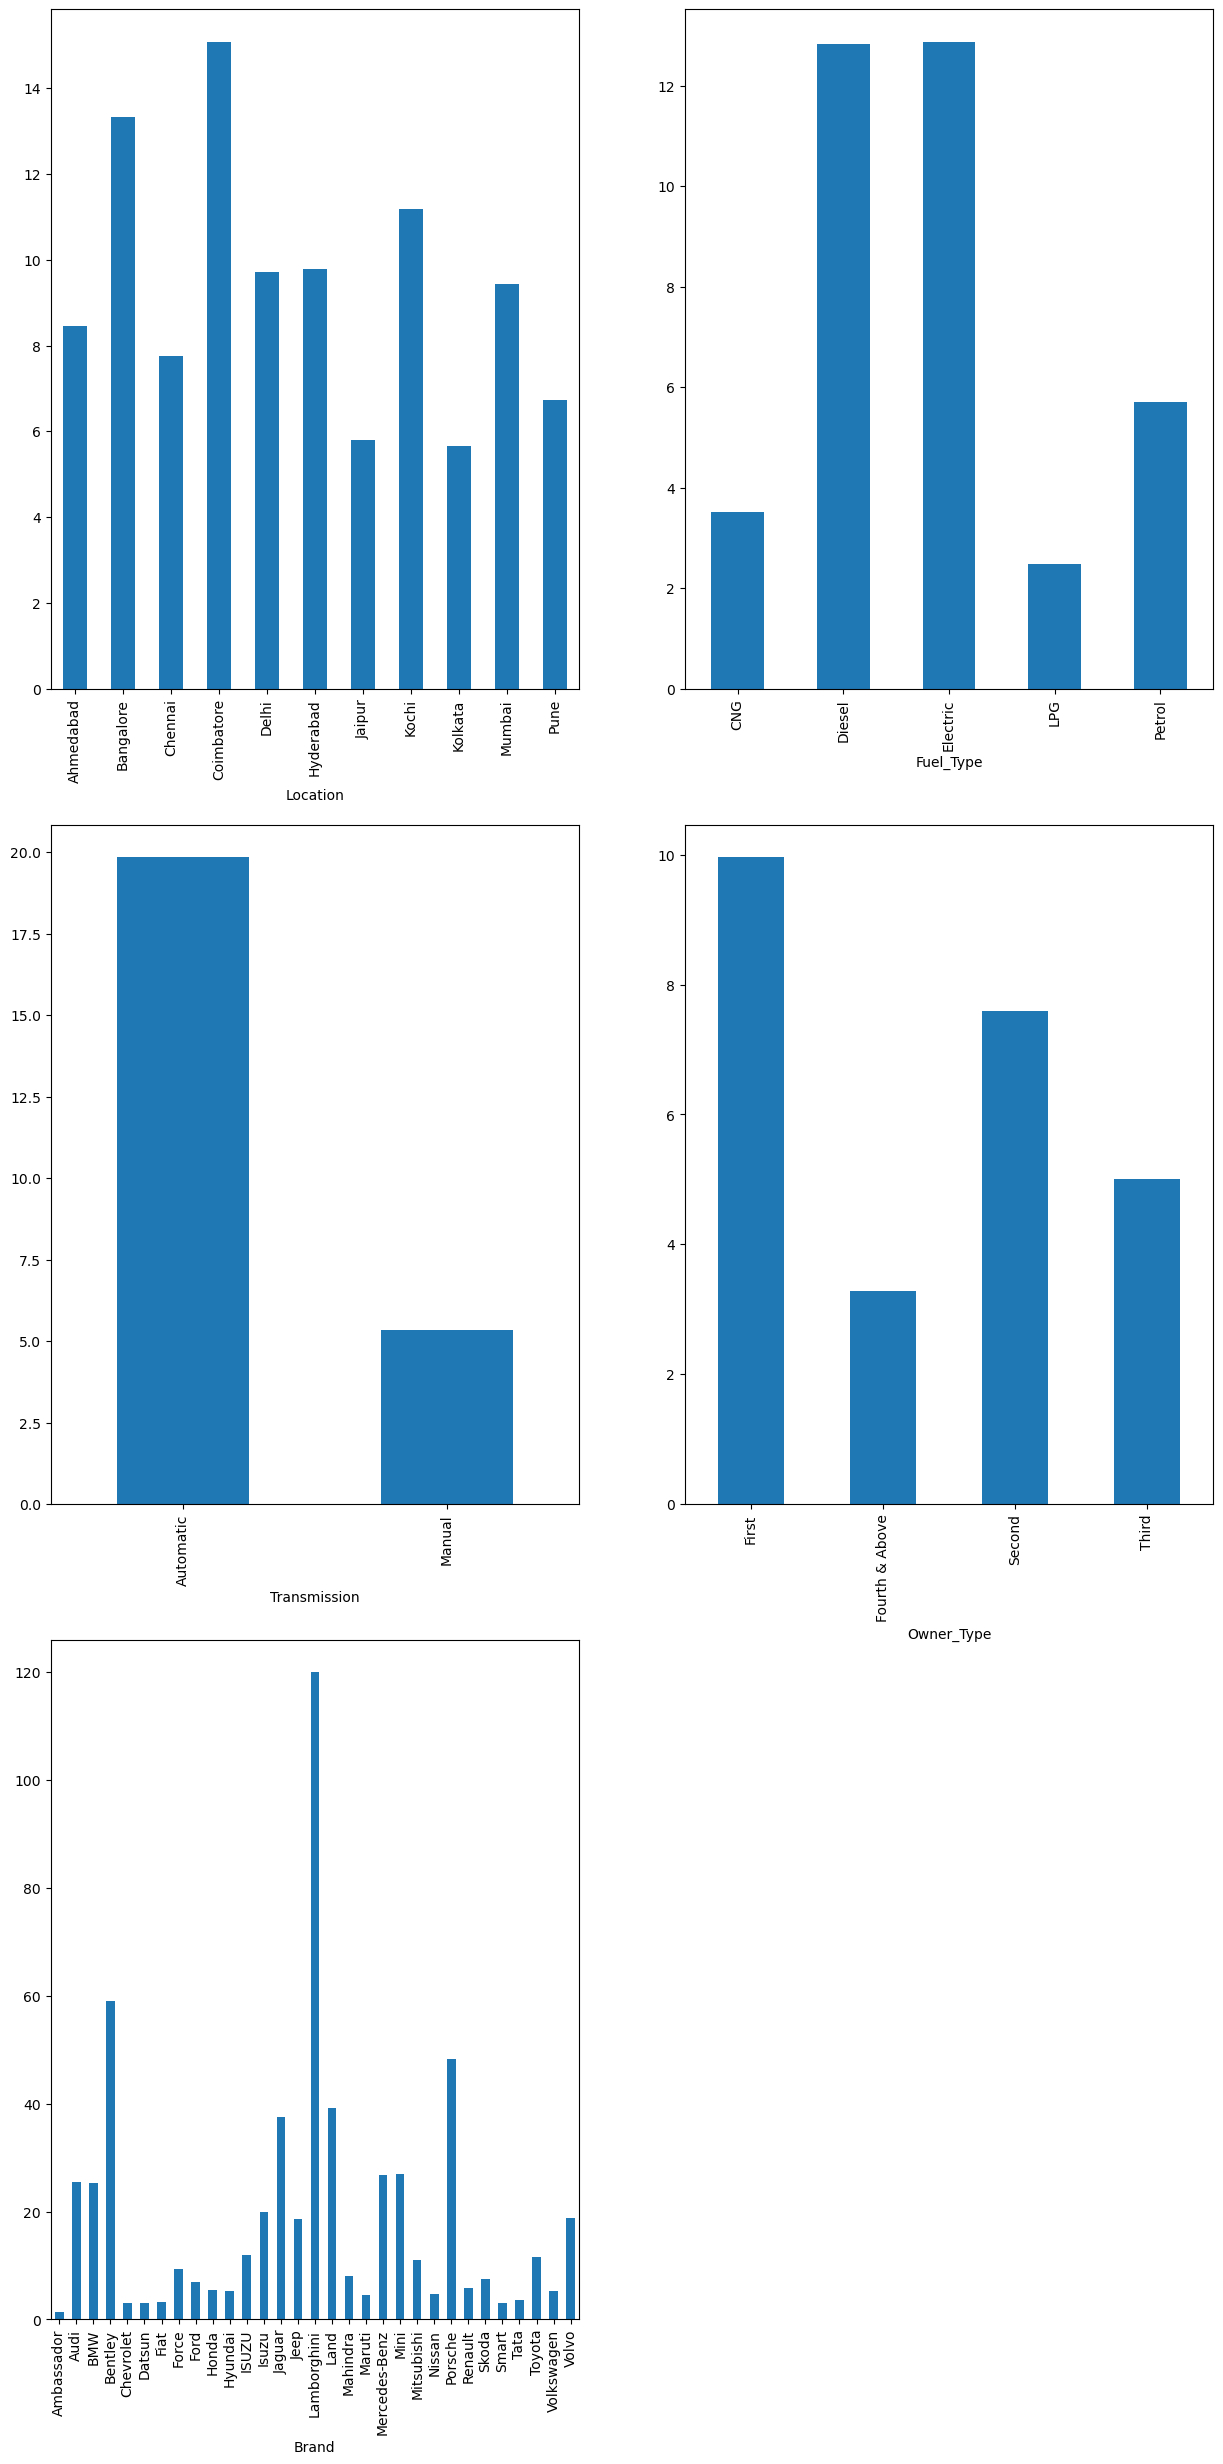

In [21]:
# Plot 'Price' (average) for each categorial variable
xlabel = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']

fig, axes = plt.subplots(3, 2, figsize=(15,30))

axe = axes.ravel()

for i, ax in zip(xlabel, axe):
    chart = df.groupby(i)['Price'].mean().plot(kind='bar', legend = False, ax = ax)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# Check if there is something plotted in the chart
for ax in axe.flat:
    if not bool(ax.has_data()):
        fig.delaxes(ax)
    
plt.show()

**Observations:**

Average prices for used cars are higher in **Coimbatore** and **Bangalore**, compared to other regions in India

**Diesel** and **Electric** used cars are priced almost the same but their price is twice as much Petrol cars

The average price of used cars with **Automatic** transmission is almost 4 times the price of **Manual** cars

**First-owner** used cars are on average more expensive than **Second-owner** cars

The average price of **'luxury used cars'** such as Lamborghini, Porsche, or Bentley is significantly higher than **'regular cars'**

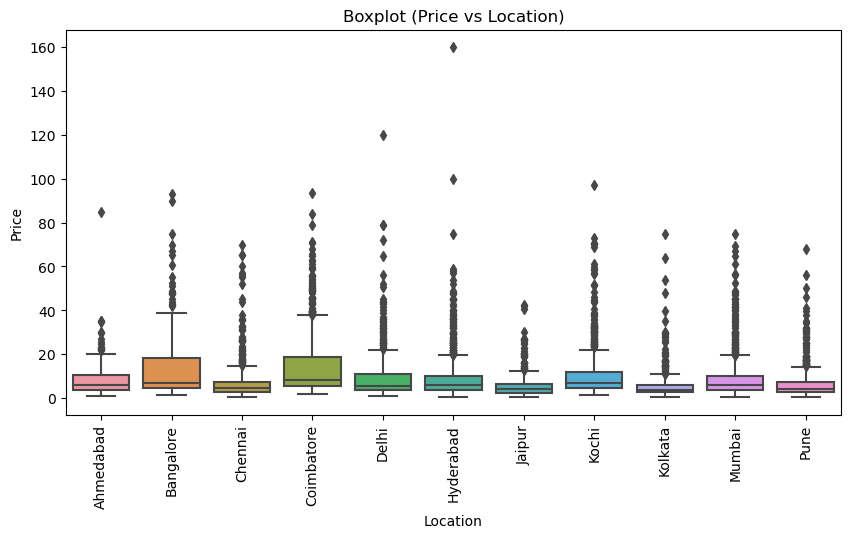

In [22]:
# Boxplot of 'Price' vs 'Location'
fig, ax = plt.subplots(figsize=(10, 5))

chart_box = sns.boxplot(x = 'Location', y = df['Price'], data = df,
                        order = df['Location'].value_counts().sort_index(ascending=True).index)

chart_box.set_xticklabels(chart_box.get_xticklabels(), rotation=90)
plt.title('Boxplot (Price vs Location)')
    
    
plt.show()

**Observations:**

As mentioned in the previous section, used cars for sale in Hyderabad have the highest average price than any other region. This is partly explained as Hyderabad includes the most expensive used cars, with a single used car (likely 'luxury car') priced at 16,000,000 INR

On the other hand, used cars in Jaipur tend to be cheaper and with a small dispersion around its average price

### **Feature Engineering (II)**

#### **Outlier Treatment**

We identified extreme values for the variable 'Kilometers_driven'. We will remove them using the interquartile range (IQR) function:

In [23]:
# Remove outlier for 'Kilometers_driven'

# Calculate the upper and lower limits
Q1 = df['Kilometers_Driven'].quantile(0.25)
Q3 = df['Kilometers_Driven'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Kilometers_Driven']>=upper)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)

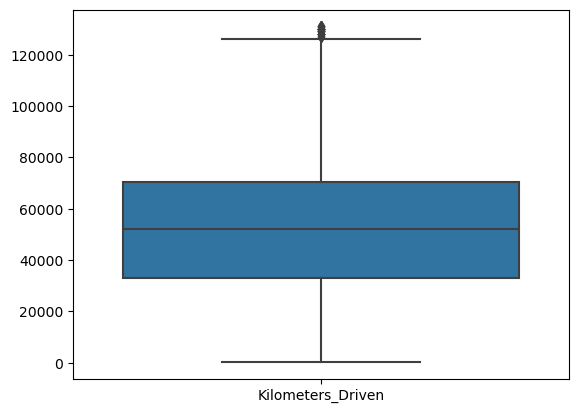

In [24]:
# Plot the boxplot for 'Kilometres_driven'

numeric_cols = df[['Kilometers_Driven']]

sns.boxplot(data = df[['Kilometers_Driven']])
ax.set_title(str(col))
    
plt.show()

**Observations:**

We note that the boxplot no longer has extreme values, compared with the boxplots in the Univariate Analysis section above

#### **Log-transformation**

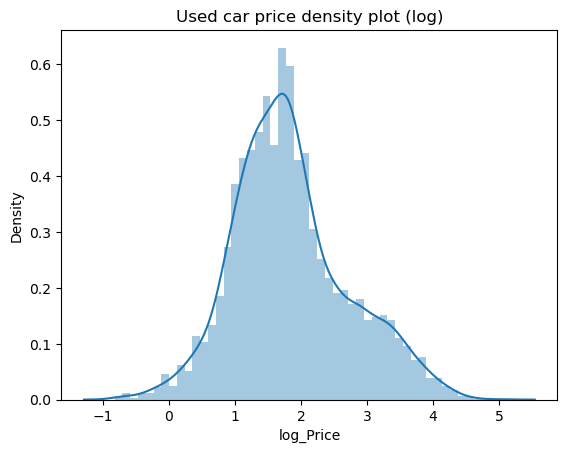

In [25]:
# Transform the dependent variable (Price) as its original distribution appears to be skewed
df['log_Price'] = np.log(df['Price'])

# Check the distribution of the transformed variable
sns.distplot(df['log_Price'], kde = True)
plt.title("Used car price density plot (log)")

plt.show()

**Observations:**

The distribution of the target variable (log-Price) looks more centered

#### **Generate dummy variables**

In [26]:
# Get dummy variables for remaining categorical variables
df = pd.get_dummies(df, columns = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], drop_first = True)

In [27]:
# Split the variable 'Brand' between 'Luxury cars' and 'Regular cars'
conditions = [(df['Brand'] == 'Porsche') | (df['Brand'] == 'Mercedes-Benz') | (df['Brand'] == 'BMW') |
              (df['Brand'] == 'Audi')    | (df['Brand'] == 'Land')          | (df['Brand'] == 'Jaguar') | 
              (df['Brand'] == 'Volvo')   | (df['Brand'] == 'Bentley')       | (df['Brand'] == 'Lamborghini'),
              
              (df['Brand'] != 'Porsche') | (df['Brand'] != 'Mercedes-Benz') | (df['Brand'] != 'BMW') |
              (df['Brand'] != 'Audi')    | (df['Brand'] != 'Land')          | (df['Brand'] != 'Jaguar') | 
              (df['Brand'] != 'Volvo')   | (df['Brand'] != 'Bentley')       | (df['Brand'] != 'Lamborghini')
             ]

values = [1,0]

df['Luxury'] = np.select(conditions,values)

In [28]:
# Drop the variable brand
df.drop(columns = {'Brand'}, inplace = True)

### **Important Insights from EDA and Data Preprocessing**

**Summary:**

 - The target variable (Price) shows a strong and positive correlation with Engine and Power. The target variable was log-transformed to remove the marked skewness observed in its density distribution
 - Extreme values were also removed from some variables, such as Kilometers-driven
 - A small percentage of missing values for the variables Mileage, Engine, Power and Seats were filled with the median of these variables
 - Diesel is the most common type of fuel among used cars and, together with Electric, are the most expensive types compared with petrol or other fuel types
 - Automatic and Luxury brand used cars have higher prices than Manual or Ordinary cars

# **3. Building Various Models**

For Regression Analysis, we will use the following algorithms and split the dataset between train and test subsets:<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

#### **Split the Data**

<li>Step1: Separate the independent variables (X) and the dependent variable (Y)
<li>Step2: Add the constant term to X
<li>Step3: Split the data into train and test using train_test_split

## 3.1. Model Building - Linear Regression

In [29]:
# Define the set of independent variables (X) and dependent variable (Y)
Y = df['log_Price']

X = df.drop(columns = {'Price', 'log_Price'})

In [30]:
# Add the intercept term
X = sm.add_constant(X)

In [31]:
# Split the dataset into the train and test data with a 80:20 rule
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [32]:
# Call the OLS algorithm on the train features (x_train) and train target variable (y_train)
ols_model_0 = sm.OLS(y_train, x_train)

# Fit the Model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     1706.
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:30:25   Log-Likelihood:                -602.29
No. Observations:                4653   AIC:                             1257.
Df Residuals:                    4627   BIC:                             1424.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations:**

We will conduct **model performance checks** before interpreting the coefficients of the OLS model

### Model Performance Check

#### Multicollinearity

In [33]:
# Test for multicollinearity

vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index = x_train.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                        829608.559704
Year                              2.125282
Kilometers_Driven                 1.820310
Mileage                           2.563389
Engine                            8.585073
Power                             8.065469
Seats                             1.753081
Location_Bangalore                2.392455
Location_Chennai                  2.706248
Location_Coimbatore               3.370509
Location_Delhi                    3.130687
Location_Hyderabad                3.451269
Location_Jaipur                   2.544915
Location_Kochi                    3.424101
Location_Kolkata                  2.998223
Location_Mumbai                   3.783529
Location_Pune                     3.103987
Fuel_Type_Diesel                 26.253949
Fuel_Type_Electric                1.026436
Fuel_Type_LPG                     1.120696
Fuel_Type_Petrol                 27.018962
Transmission_Manual               2.143557
Owner_Type_Fourth & Above         1.0090

**Observations:**

The variables Engine, Power, Fuel_Type_Diesel and Fuel_Type_Petrol have a VIF value higher than 5, suggesting the presence of collinearity. We we will drop **Engine and Fuel_Type_Petrol** and check the results

In [34]:
# Drop variables with a high VIF value from the set of features in the training (and test) set
x_train = x_train.drop(columns = {'Engine', 'Fuel_Type_Petrol'})
x_test = x_test.drop(columns = {'Engine', 'Fuel_Type_Petrol'})

vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index = x_train.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                        827531.096051
Year                              2.121298
Kilometers_Driven                 1.808567
Mileage                           2.128484
Power                             3.028677
Seats                             1.508413
Location_Bangalore                2.391856
Location_Chennai                  2.703739
Location_Coimbatore               3.367891
Location_Delhi                    3.129971
Location_Hyderabad                3.449588
Location_Jaipur                   2.541690
Location_Kochi                    3.423268
Location_Kolkata                  2.994764
Location_Mumbai                   3.783218
Location_Pune                     3.103269
Fuel_Type_Diesel                  1.780746
Fuel_Type_Electric                1.003510
Fuel_Type_LPG                     1.005962
Transmission_Manual               2.143090
Owner_Type_Fourth & Above         1.008977
Owner_Type_Second                 1.164288
Owner_Type_Third                  1.1109

**Observations:**

Note that the remaining variables have VIF values lower than 5, so we keep these variables for the moment

In [35]:
# Call the OLS algorithm on the updated train features (x_train) and train target variable (y_train)
ols_model_1 = sm.OLS(y_train, x_train)

# Fit the Model
ols_res_1 = ols_model_1.fit()

print(ols_res_1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1793.
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:30:26   Log-Likelihood:                -673.99
No. Observations:                4653   AIC:                             1396.
Df Residuals:                    4629   BIC:                             1551.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations:**

- We can observe that the variables 'Location_Chennai', 'Location_Delhi', 'Location_Kochi', 'Location_Mumbai','Fuel_Type_LPG' and 'Owner_Type_Fourth & Above' are **not statistically significant**, so we drop them from the model
                              
- Also, the variable 'Kilometers_Driven' has an estimated coefficient almost equal to zero (~0), so its impact on the dependent variable is negligible and we cannot establish a relationship between this and the target variable. We will also drop it from the model

In [36]:
# Drop the following variables:
    # Non-statistically significant variables from the training (and test) dataset
    # Variables with a negligible impact on the dependent variable
    
x_train = x_train.drop(columns={'Location_Chennai','Location_Delhi','Location_Kochi', 'Location_Mumbai',
                              'Fuel_Type_LPG','Owner_Type_Fourth & Above', 'Kilometers_Driven'})

x_test = x_test.drop(columns={'Location_Chennai','Location_Delhi','Location_Kochi', 'Location_Mumbai',
                              'Fuel_Type_LPG','Owner_Type_Fourth & Above', 'Kilometers_Driven'})

In [37]:
# Call the OLS algorithm on the updated train features (x_train) and train target variable (y_train)
ols_model_final = sm.OLS(y_train, x_train)

# Fit the Model
model_ols = ols_model_final.fit()

print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     2544.
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:30:26   Log-Likelihood:                -704.25
No. Observations:                4653   AIC:                             1442.
Df Residuals:                    4636   BIC:                             1552.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -253.8872    

**Observations:**

The following variables are **statistically significant** and we can **interpret** their relationship with the target variable as follows:

**Year**: One additional year of the car age decreases the used car price by 12.6%

**Mileage**: An increase in one unit of km/kg decreases the used car price by 2.0%

**Power**: An increase in one unit of bhp increases the used car price by 0.65%

**Seats**: One extra seat increases the used car price by 5.6%

**Location**: Used car prices are 16.5%, 9.5% and 11.9% higher in Bangalore, Coimbatore and Hyderabad, respectively, compared to other locations. Whereas used car prices are 5.2%, 20% and 3.9% lower in Jaipur, Kolkata and Pune, respectively, compared with other locations

**Fuel_Type**: Diesel car types are 29% more expensive than other type of cars. Electric car types are 140% more expensive than other type of cars

**Transmission**: Manual transmission used cars are 18% cheaper than Automatic cars

**Owner_Type**: Used car prices decrease with type of owner. Second-owner and third-owner used cars are 7% and 13% cheaper, respectively, than other type of owners

**Luxury**: Luxury used cars are 53% more expensive than Ordinary cars

### Model evaluation metrics

#### R-Squared, Mean Squared Error (MSE), Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)

In [38]:
# Create a function to calculate the performance metrics from the models

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Model Performance on test and train data
def model_pref(model, x_train, x_test):

    # In-sample Prediction
    y_pred_train = model.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = model.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data ": ["Train ", "Test "],
                
                "r2 " : [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
                
                "MSE ": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                
                "MAE ": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                
                "MAPE ": [
                    mean_absolute_percentage_error(y_pred_train, y_observed_train),
                    mean_absolute_percentage_error(y_pred_test, y_observed_test),
                ], 
                
            }
        ).to_string(index=False)
    )

In [39]:
# Check the performance of the final OLS model
model_pref(model_ols, x_train, x_test)

 Data       r2      MSE      MAE     MAPE 
Train  0.886126 0.281511 0.204948 0.189965
 Test  0.866121 0.282329 0.208395 0.204488


**Observations:**

Note that the model provides a **good fit to the data**, as the **R-Squared** is close to 0.87 both in the train and test datasets. Moreover, the **MAPE** is close to 20% in the test dataset, indicating an acceptable accuracy in the model's predictive power 

#### Cross validation

In [40]:
# Fitting linear model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_reg = LinearRegression()                                    

cv_Score11 = cross_val_score(linear_reg, x_train, y_train, cv = 10)

cv_Score12 = cross_val_score(linear_reg, x_train, y_train, cv = 10, 
                             scoring = 'neg_mean_absolute_error')                                  


print("R-Squared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std()*2))

print("MAE: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std()*2))

R-Squared: 0.896 (+/- 0.032)
MAE: 0.206 (+/- 0.016)


**Observations:**

The R-Squared in the cross-validation (0.89) is close to the R-Squared in the final OLS model for the train dataset (0.87). Similarly, the MAE in the cross-validation (0.21) is very close to the MAE in the OLS training dataset (0.20).

This model seems just the right fit, as it is giving a **generalized performance**.

### Test the assumptions - Linear Regression

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

1. Zero-mean residuals

2. Error terms are normally distributed

3. Homoscedasticity

4. Linearity

#### 1. Zero-mean residuals

In [41]:
# Compute the mean of the residuals
residual = model_ols.resid

residual.mean()

-2.0646321054650524e-13

As the mean of the residuals is almost zero, **the first assumption is satisfied**.

#### 2. Error terms are normally distributed

In [42]:
# Find out the 5.0 and 95.0 percentile for the slopes obtained
Residuals = np.array(residual)
Sort_Residuals = np.sort(Residuals)


Residuals_limits = np.percentile(Sort_Residuals, (5.0, 95.0))

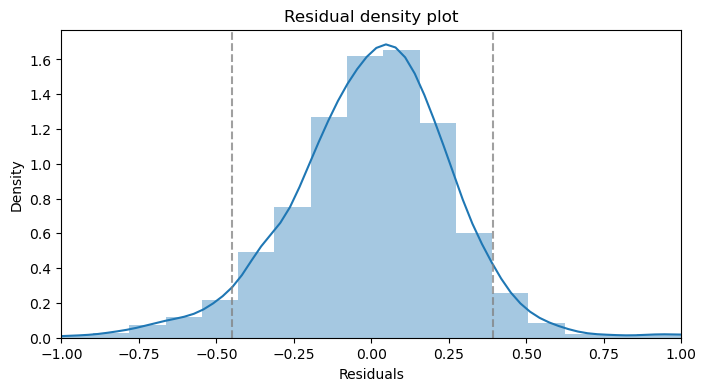

In [43]:
# Plot the histogram of the residuals
fig = plt.figure(figsize=(8,4))

sns.distplot(residual, kde = True)
plt.xlabel('Residuals')
plt.axvline(Residuals_limits[0], color = 'gray', alpha = 0.75, linestyle='--')
plt.axvline(Residuals_limits[1], color = 'gray', alpha = 0.75, linestyle='--')
plt.xlim([-1.0, 1.0])
plt.title("Residual density plot")

plt.show()

The shape of the densitiy of the residuals follows a normal distribution, hence **the second assumption is satisfied**.

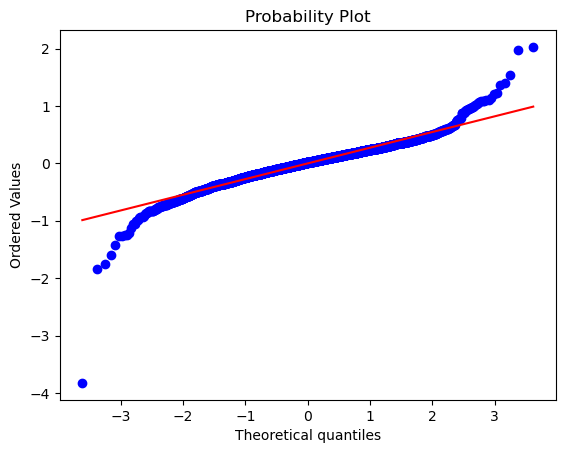

In [44]:
# Show the Quantile-Quantile (Q-Q) plot
stats.probplot(residual, dist = 'norm', plot = py)

plt.show()

Note that the data points from our dataset lie approximately in the straight line. Thus, we can conclude that the errors are normally distributed.

#### 3. Homoscedasticity

In [45]:
# Perform the Goldfeldquandt test for homoscedasticity
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, x_train)

values = lzip(name, test)

print('p-value is', round(values[1][1],2))

p-value is 0.06


Note from the above test that the p-value is greater to 0.05, so we fail to reject the null-hypothesis. Thus, the residuals are homoscedastic and **the third assumption is satisfied**.

#### 4. Linearity

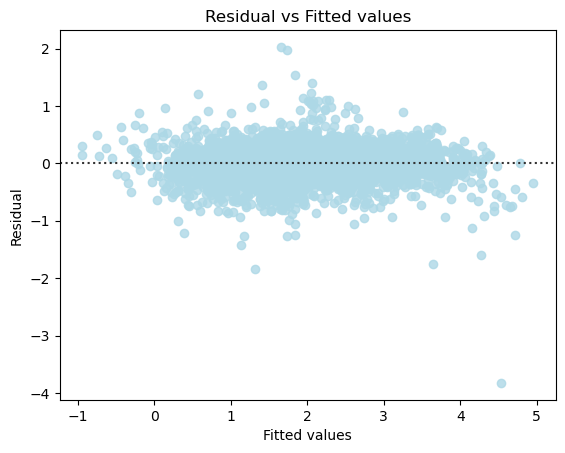

In [46]:
# Predicted values
fitted = model_ols.fittedvalues

sns.residplot(x = fitted, y = residual, color = "lightblue")

plt.xlabel("Fitted values")
plt.ylabel("Residual")
plt.title("Residual vs Fitted values")

plt.show()

Finally, note that we cannot identify any clear pattern in the residuals vs fitted values scatter plot, so **the linearity assumption is satisfied**.

## 3.2. Model Building - Ridge/Lasso Regression

## Ridge Regression

In [47]:
ridge = Ridge()

model_ridge = ridge.fit(x_train, y_train)

In [48]:
model_pref(model_ridge, x_train, x_test)

 Data       r2      MSE      MAE     MAPE 
Train  0.885883 0.281699 0.205129 0.187349
 Test  0.865979 0.282165 0.208295 0.196488


**Observations:**

The Ridge Regression model provides a **good fit to the data**, and the **R-Squared** and **MAPE** values are close the OLS model

## Lasso Regression

In [49]:
lasso = Lasso()

model_lasso = lasso.fit(x_train, y_train)

In [50]:
model_pref(model_lasso, x_train, x_test)

 Data       r2      MSE      MAE     MAPE 
Train  0.444736 0.492955 0.369225 0.215659
 Test  0.386165 0.470450 0.359970 0.212675


**Observations:**

The Lasso Regression model does not provide a good fit to the data, as the **R-Squared** drops significantly from the OLS model

## 3.3. Model Building - Decision Trees

In [51]:
# Build decision tree model
decision_tree = DecisionTreeRegressor()

In [52]:
# Fit decision tree model
model_tree = decision_tree.fit(x_train, y_train)

In [53]:
model_pref(model_tree, x_train, x_test)

 Data       r2      MSE      MAE         MAPE 
Train  0.996847 0.049360 0.020749 1.386293e-02
 Test  0.888995 0.276599 0.184442 6.627371e+12


**Observations:**

Although the Decision Tree model provides a **good fit to the data** (given the high **R-Squared** value) it provides unreasonably large values for the MAPE, so we will tune the model to improve the results: 

### **Hyperparameter Tuning: Decision Tree**

In [54]:
# Choose the type of classifier
dtree_estimator = DecisionTreeRegressor()

# Define random state for reproducible results
np.random.seed(1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['squared_error'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
model_dtree = dtree_estimator.fit(x_train, y_train)

In [55]:
model_pref(model_dtree, x_train, x_test)

 Data       r2      MSE      MAE     MAPE 
Train  0.885743 0.281935 0.210774 0.250102
 Test  0.852079 0.303501 0.227211 0.294080


**Observations:**

The (tuned) Decision Tree model provides a **fair fit to the data**, given the **R-Squared** values both in the train and test datasets. However, the **MAPE** at 29% in the test dataset does not deliver an acceptable accuracy

**Feature Importance**

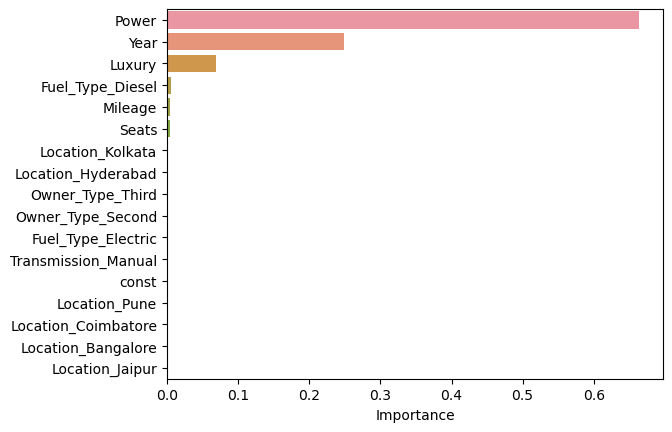

In [56]:
importances = dtree_estimator.feature_importances_

X_set = x_train

columns = X_set.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

sns.barplot(x=importance_df.Importance, y=importance_df.index);

**Observations:**

The Decision Tree model shows that the variables **Power, Year and Luxury** are the most important features of the model

## 3.4. Model Building - Random Forest

In [57]:
# Building decision tree model
random_forest = RandomForestRegressor()

In [58]:
# Fitting decision tree model
model_random_forest = random_forest.fit(x_train, y_train)

In [59]:
model_pref(model_random_forest, x_train, x_test)

 Data      r2      MSE      MAE     MAPE 
Train  0.98804 0.094291 0.065563 0.065875
 Test  0.92292 0.223852 0.152997 0.317981


**Observations:**

The Random Forest model provides a **very good fit to the data**, given the high **R-Squared** and low **MAPE** values in the train datasets. However, the **MAPE** is much higher in the test dataset, thus suggesting overfitting and not providing acceptable accuracy. We will tune the model to see if we can improve the results:

### **Hyperparameter Tuning: Random Forest**

In [60]:
# Choose the type of classifier
rforest_estimator = RandomForestRegressor()

# Define random state for reproducible results
np.random.seed(1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['squared_error'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Run the grid search
gridCV = GridSearchCV(rforest_estimator, parameters, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rforest_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
model_rforest = rforest_estimator.fit(x_train, y_train)

In [61]:
model_pref(model_rforest, x_train, x_test)

 Data       r2      MSE      MAE     MAPE 
Train  0.895911 0.264758 0.195109 0.191944
 Test  0.861242 0.288441 0.210322 0.216289


**Observations:**

The Random Forest model after tuning provides a **good fit to the data**, given the high **R-Squared** and low **MAPE** values both in the train and test datasets. However, the R-Squared in the test dataset is lower than the train dataset

**Feature Importance**

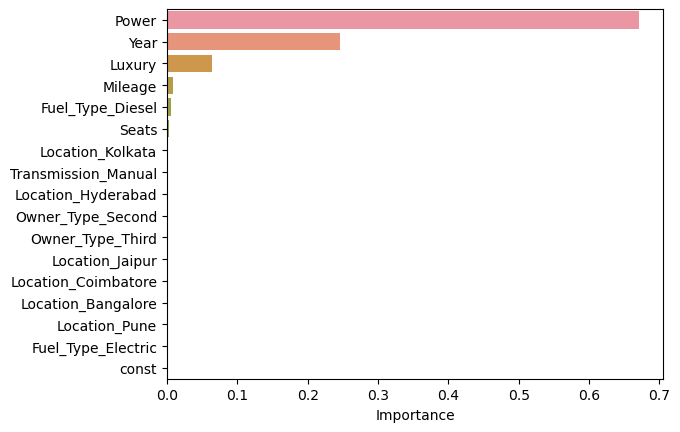

In [62]:
importances = rforest_estimator.feature_importances_

X_set = x_train

columns = X_set.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

sns.barplot(x=importance_df.Importance, y=importance_df.index);

**Observations:**

Similar to the feature importance of The Decision Tree model, the Random Forest also shows that the variables **Power, Year and Luxury (and Mileage)** are the most important features of the model

# **4. Conclusions and Recommendations**

**Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- We choose two performance metrics:
                   
     - **R-Squared**: To assess the model fit to the data
     
     - **MAPE**: To determine the accuracy of the model relative to the actual data in percentage terms. Additionally, we choose MAPE as it is not sensitive to outliers compared with other metrics such has MSE or RMSE

In [63]:
# Create a list of the models we have trained
models = [model_ols, model_ridge, model_lasso, model_dtree, model_rforest]
names = ['OLS','Ridge','Lasso','Decision Tree (tuned)','Random Forest (tuned)']

# Loop through all the models to get the r2 scores, mse, mae and mape
for i, j in zip(models, names):
    
    # Accuracy score
    print('\033[1m{:10s}\033[0m'.format(j))
    model_pref(i,x_train,x_test)
    print("\n")
    

OLS       
 Data       r2      MSE      MAE     MAPE 
Train  0.886126 0.281511 0.204948 0.189965
 Test  0.866121 0.282329 0.208395 0.204488


Ridge     
 Data       r2      MSE      MAE     MAPE 
Train  0.885883 0.281699 0.205129 0.187349
 Test  0.865979 0.282165 0.208295 0.196488


Lasso     
 Data       r2      MSE      MAE     MAPE 
Train  0.444736 0.492955 0.369225 0.215659
 Test  0.386165 0.470450 0.359970 0.212675


Decision Tree (tuned)
 Data       r2      MSE      MAE     MAPE 
Train  0.885743 0.281935 0.210774 0.250102
 Test  0.852079 0.303501 0.227211 0.294080


Random Forest (tuned)
 Data       r2      MSE      MAE     MAPE 
Train  0.895911 0.264758 0.195109 0.191944
 Test  0.861242 0.288441 0.210322 0.216289




We examine the results for the prefered metrics (R-Squared and MAPE)

  - **Train dataset:** All models (except Lasso) have an R-Squared of 0.89. With respect to MAPE, we observe that OLS, Ridge and Random Forest have a value of 19%, whereas the Lasso and Decision Tree models have a MAPE of more than 21%

   - **Test dataset:** OLS and Ridge have the highest R-Squared (0.87), followed by Decision Tree (0.85) and Random Forest (0.86). Finally, the Lasso model fit scores poorly (0.39). On the other hand, both OLS and Ridge have the same MAPE value of 20%, whereas the remaining models have a MAPE of more than 21%

**Summary:**

OLS and Ridge are performing similarly between each other, and better than the remaining models on both the train and test datasets. The former can be explained as the Ridge model is useful to mitigating multicollinearity in linear regression. However we have addressed multicollinearity in the OLS model by removing variables (Engine and Fuel_Type_Petrol) with a high VIF value. So, the regularization provided by Ridge may not be effective if multicollinearity is already removed from a linear model

Decision Tree and Random Forest are non-linear models which allows us to uncover relationships between independent and target variable with minimal assumptions. However, in this case (used cars price prediction) they do not perform as good as linear models which are easier to interpret

&nbsp;

**Proposal for the final solution design:** 

We propose to implement the following **OLS model**, both in terms of its good performance and easy interpretability:


log(**Price**) = -253.887 + 0.126∗**Year** - 0.020∗**Mileage** + 0.006∗**Power** + 0.056∗**Seats** + 0.165∗**Loc_Bangalore** + 0.095∗**Loc_Coimbatore** + 0.119∗**Loc_Hyderabad** - 0.052∗**Loc_Jaipur** - 0.200∗**Loc_Kolkata** - 0.039∗**Loc_Pune** + 0.291∗**Fuel_Type_Diesel** + 1.402∗**Fuel_Type_Electric** - 0.184∗**Transmission_Manuel** - 0.070∗**Owner_Type_Second** - 0.132∗**Owner_Type_Third** + 0.532∗**Luxury**

**Performance**

- Overall, the OLS model performance retrieved the best prefered metrics across the train and test datasets. In particular, the R-Squared is 0.86 and the MAPE 20%
- Although other models retrieved a slightly higher R-Squared either in the train or test datasets, none of these models displayed a lower MAPE in either split. The only exception is the Ridge Regression which MAPE also stood at 20% in the test dataset


**Interpretability**

- However, the OLS model is also the best solution owing to its interpretability
- As the OLS model is linear in its parameters, it is straight forward to understand the partial effects (or direction of change) of the independent variables on the target variable
- For instance, the log-transformation of the target variable (price) allows us to interpret the OLS model coefficients as semi-elasticities (in percentage terms) for the relevant variables
- Finally, the performance of OLS relies on a set of assumptions which were all satisfied for this dataset

In conclusion, the **OLS model is the best solution** for deployment in production

-----------------------------
-----------------------------

-----------------------------
# **Executive Summary**
-----------------------------

This project proposes the **OLS (Ordinary Least Squares) Regression Model** for predicting used car prices in the Indian market. The suggested model satisfies the OLS assumptions and displays high performance with observed data and low percentage error on the preferred evaluation metrics. Moreover, the model captures the magnitude of changes in key drivers of used car prices, such as power system, number of seats, car age or fuel type. 

However, the model is subject to some limitations, including the absence of other key attributes that may impact the used car price. For instance, certified used cars featuring extended warranties and inspections may involve a premium on the car price. Finally, demand-side factors such as household income or interest rates per region may also be important drivers of affordability and credit in this market.

-----------------------------
# **Problem Summary**
-----------------------------

The used car market in India is a significant segment of the automotive industry, and it has grown in popularity over the years due to several factors, including the rising middle class, improved durability of vehicles, and the availability of online platforms to facilitate transactions. The used car market is expected to grow to 8 million units over the next three years, with a ratio of used-to-new cars of almost two. Developing a thourough understanding of the main drivers of this market can enable suppliers to design effective price schemes to tap into this market with confidence. 

The objective of this project is to **implement a pricing model for the used car market** segment that can effectiely predict the car price. The OLS analysis presented here provides insight into the relative contributions of several used car attributes on the used car price across Indian locations. The findings of the model will help used car suppliers to effectively set a car price given this set of attributes.

-----------------------------
# **Solution Design**
-----------------------------

Several Regression models were explored as part of the solution design, including OLS, Ridge and Lasso, Decision Tree and Random Forest. The used car price dataset was split and models were trained and tested on each subset.

The final proposed solution is the **Ordinary Least Squares (OLS)** Regression model, owing to its good performance and easy interpretability. Moreover, all the assumptions of the OLS model were satisfied, which indicates a robust model outcome. This model yielded a high **R-Squared** (0.89 and 0.87 for train and test data, respectively) and a relatively low **MAPE** (19% and 20% for train and test data, respectively).

**Figure 1** shows the performance of the best model in the test dataset. It is clear from the figure that the predicted values from the OLS model are very close to the actual values in the test dataset. It is worth mentioning that the Ridge Regression delivered almost similar performance metrics to OLS. However, regularization  methods lead to none or marginal gain in the performance metrics as our OLS specification addressed the presence of multicollinearity issues beforehand. We prefer OLS as it is simple and easily interpretable.

#### Figure 1. Best overall model (OLS)

In [64]:
# Obtain the model predictions and keep them in log scale
predict_test = model_ols.predict(x_test)


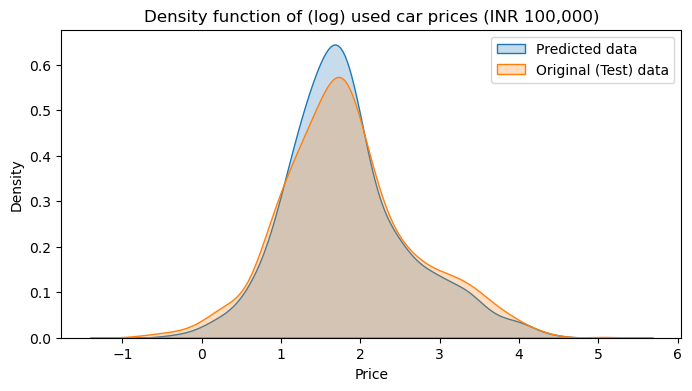

In [65]:
# Plot the predict_test with the y_test
fig = plt.figure(figsize=(8,4))

sns.distplot(predict_test, hist = False, kde = True, kde_kws = {'shade':True}, label = 'Predicted data')
sns.distplot(y_test, hist = False, kde = True, kde_kws = {'shade':True}, label = 'Original (Test) data')

plt.xlabel('Price')
plt.legend()
plt.title('Density function of (log) used car prices (INR 100,000)')

plt.show()


-----------------------------
### **Analysis and Key Insights**
-----------------------------

#### Direction

 The model was effective in capturing the direction of change of a set of attributes on used car prices that are consistent with their inherent characteristics:

   - Used car prices are positively related to newer models, car power, number of seats, electric fuel type, and luxury brands
   - Used car prices are negatively related to mileage, petrol fuel type, manual transmission, and type of owner
   - Used car prices are are more expensive in affluent locations, such as Bangalore, Coimbatore and Hyderabad

#### Magnitude

Moreover, the OLS model allows to quantify the size of the magnitude of the coefficients in the used car price. For instance, Electric used cars are 140% more expensive than non-Electric cars. Luxury cars (such as Porsche or Audi) are more than 50% expensive than Ordinary cars. Or used cars in Bangalore are 16% more expensive than in any other region. On the other hand, one extra year of manufacturing age drops the used car by almost 13%. And manual transmission used cars are 18% cheaper than automatic ones.

**Figure 2** shows a chart with the magnitude of an increase in one unit of each attribute on the (log) used car price (in percentage terms).

#### Figure 2. Direction and magnitude of OLS coefficients

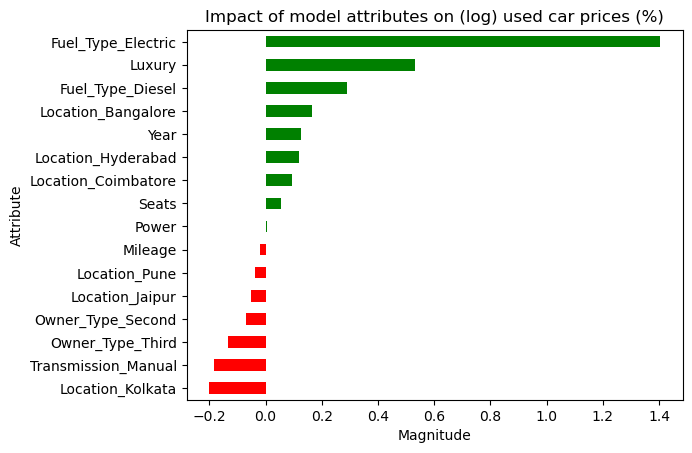

In [66]:
# Plot a bar chart with the coefficient values
model_ols.params[1:].sort_values().plot(kind='barh', legend = False, 
                                        color=(model_ols.params[1:]>0).sort_values().map({True: 'g', False: 'r'}))

plt.title('Impact of model attributes on (log) used car prices (%)')
plt.xlabel('Magnitude')
plt.ylabel('Attribute')

plt.show()

-----------------------------
# **Recommendations for Implementation**
-----------------------------

### Key recommendations

The above analysis demonstrates the advantages of using used car information attributes with a data-driven approach to guide the price of the used car, which implications may not be readily apparent without a model-based angle. For example, a luxury car with similar attributes can be sold for a significantly higher price (~40% more) in Bangalore than in Kolkata. Or an electric used car can be priced at least twice the amount of a diesel or LPG fuel-type car.

### Actionable strategies

#### Benefits and opportunities

Moreover, the analysis is relevant to inform strategies with longer horizons that may incorporate broader trends, such as **digitalization** and **sustainability**. 

Concerning the **former**, the advent of technology adoption has resulted in the widespread reach of products, such as used cars. This situation is highly relevant in emerging markets, such as India, where demand for used cars tends to concentrate in less urban areas. Thus, there is an opportunity for these companies to devise an effective pricing strategy and tap into markets like Jaipur and Kolkata. Additionally, digitalization has contributed to developing platforms highlighting the environmental benefits of purchasing used cars, thus contributing to more sustainable, green and eco-friendly choices.

For the **latter**, the rise in environmental standards in the context of the energy transition creates an **opportunity** for the used car market to thrive generally (and particularly in the electric vehicle segment) through at least two channels: 

- reduction in carbon footprint: new (motorized) cars need to use significant natural resources and energy, thus contributing to carbon emissions (as opposed to electric vehicles). The availability of used cars reduces the demand for new cars, which helps lowering carbon emissions.

- embracement of the circular economy: similarly to the point above, the circular economy means that resources can be used more efficiently and products (cars) kept in use for as long as possible. The latter contributes to dropping the demand for new cars.

#### Costs and risks

Although digitalization and sustainability trends bring opportunities to enhance information and environmentally friendly solutions, some **challenges** remain. The availability of online platforms has not yet resulted in the provision of transparent and verifiable metrics regarding the conditions of used cars. 

Leveraging these platforms to gather, standardize and publish such information is crucial to the effective pricing of cars, as unrecognized **risks** can lead to costs down the line for the company on faulty used vehicles, such as product liability. 

Achieving sustainable outcomes can only be materialized if key metrics inform the purchasing of a used car, such as fuel efficiency and emissions levels. However, this strategy carries the **cost** of monitoring and incorporating relevant metrics into the analysis with a dedicated analytics team.

### Further analysis

To conclude, we suggest incorporating potential latent variables into the model to refine the information not contained in the location indicator variables, such as regional household income and interest rates. Including these variables, together with the used car conditions mentioned above, can enrich the company's sales strategy.

-----------------------------
### **Bibliography**
-----------------------------

 - Ravi Mehra, 2023. 'The untapped potential of the used car market in India'

  https://timesofindia.indiatimes.com/blogs/voices/the-untapped-potential-of-the-used-car-market-in-india/

In [67]:
# Code to toggle on or off all the raw code of the notebook

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code"></form>''')

### Code written by C.AriasOrtega